In [1]:
import pandas as pd
import seaborn as sns
import pycaret as pyc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss # use as custom input
from pycaret.classification import *


le = LabelEncoder()

CLASSIFICATION_TARGET = 'seasonal_vaccine'

data = pd.read_csv('../../data/training_set_features.csv', index_col=0)
target = pd.read_csv('../../data/training_set_labels.csv')[CLASSIFICATION_TARGET]
df = data.join(target, how='inner')
# tdata.colurain, test = train_test_split(df, shuffle=False)data.columns
df = df.astype('category')
for col in df:
    df[col] = df[col].cat.codes
    
cols = df.drop(CLASSIFICATION_TARGET, axis=1).columns

### Fitting PyCaret models

In [2]:
clf = setup(data=df, target=CLASSIFICATION_TARGET,session_id=123, normalize=True, fix_imbalance=True, html=True, feature_selection=True,
            remove_outliers=True, remove_multicollinearity=True, remove_perfect_collinearity=True, multicollinearity_threshold=0.8,
           log_profile=True, fold_strategy='stratifiedkfold')

add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False)

,Description,Value
0,session_id,123
1,Target,seasonal_vaccine
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26707, 36)"
5,Missing Values,False
6,Numeric Features,35
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Name                                                        LogLoss
Display Name                                                LogLoss
Score Function                <function log_loss at 0x7f62a8608e18>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [4]:
top10 = compare_models(n_select = 5, sort='AUC') 
# tune top 5 base models
tuned_top10 = [tune_model(i, optimize='LogLoss') for i in top10]
# ensemble top 5 tuned models
# bagged_top5 = [ensemble_model(i) for i in tuned_top10]
# blend top 5 base models 
#blender = blend_models(estimator_list = bagged_top5) 
# select best model tprin
best = automl(optimize = 'LogLoss')
tuned_top10

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.7765,0.8444,0.7759,0.7767,0.7765,0.5513,0.5514,7.7208
1,0.7838,0.8511,0.7834,0.7841,0.7839,0.5662,0.5663,7.4679
2,0.7731,0.8399,0.7717,0.7729,0.7730,0.5438,0.5438,7.8374
3,0.7798,0.8524,0.7783,0.7797,0.7797,0.5572,0.5573,7.6041
4,0.7787,0.8528,0.7786,0.7793,0.7789,0.5563,0.5565,7.6430
5,0.7967,0.8772,0.7967,0.7973,0.7969,0.5924,0.5926,7.0206
6,0.7883,0.8647,0.7878,0.7885,0.7884,0.5751,0.5751,7.3124
7,0.7928,0.8679,0.7935,0.7941,0.7930,0.5851,0.5858,7.1568
8,0.7725,0.8571,0.7726,0.7733,0.7727,0.5440,0.5443,7.8569
9,0.7882,0.8541,0.7869,0.7881,0.7881,0.5742,0.5743,7.3165


 LGBMClassifier(bagging_fraction=0.4, bagging_freq=5, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
                importance_type='split', learning_rate=0.059, max_depth=-1,
                min_child_samples=40, min_child_weight=0.001, min_split_gain=0.5,
                n_estimators=130, n_jobs=-1, num_leaves=20, objective=None,
                random_state=123, reg_alpha=5, reg_lambda=0.15, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.163, loss='deviance', max_depth=3,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.5, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=7,
                            min_weight_fraction_leaf=0.0, n_estimators=220,
    

In [ ]:
interpret_model(top10[3])

In [ ]:
evaluate_model(best)

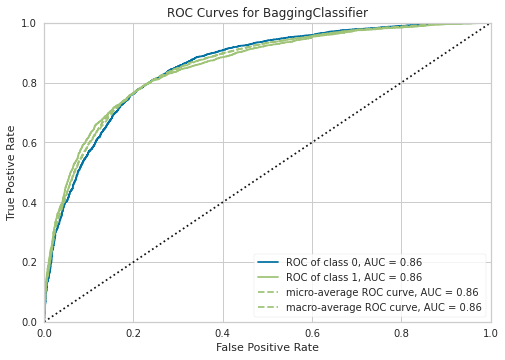

In [8]:

from pycaret.utils import enable_colab
enable_colab()


plot_model(best)

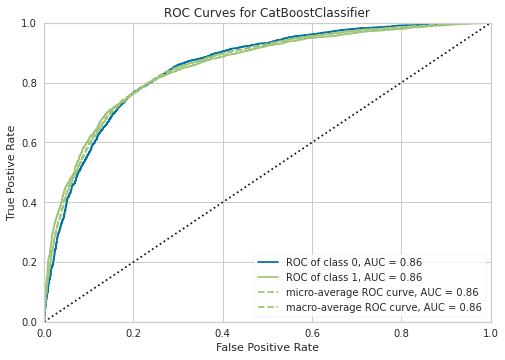

In [12]:
plot_model(top10[0])
